In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime
import yfinance as yf

In [ ]:
start_date = '2010-01-01'
end_date = '2019-12-31'

# Fetch the data using yfinance
df = yf.download('AAPL', start=start_date, end=end_date)

# Display the first few rows of the dataframe
df.head()


In [ ]:
df.tail()

In [ ]:
df= df.reset_index()
df.head()

In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100= df.Close.rolling(100).mean()
ma100

In [ ]:
plt.plot(df.Close)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200= df.Close.rolling(200).mean()
ma200

In [ ]:
plt.plot(df.Close)
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

In [ ]:
#splitting data into training and testing
data_training = pd.DataFrame (df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))



In [ ]:
data_training_array= scaler.fit_transform(data_training)
data_training_array.shape

In [ ]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append([i, 0])

x_train,y_train= np.array(x_train), np.array(y_train)

x_train.shape

In [ ]:
#ML MODEL
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model= Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences= True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu',return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu',return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)


In [ ]:
model.save('/content/drive/MyDrive/streamlit/keras_model.keras')

In [ ]:
model.export('/content/drive/MyDrive/streamlit/keras_model')


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from keras.models import load_model
from tensorflow.keras.models import load_model

model = load_model('keras_model.keras')

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test,y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)


In [ ]:
#making predictions

y_predicted= model.predict(x_test)
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [3]:
! pip install pandas

zsh:1: /Users/tush/Developer/python/venv/bin/pip: bad interpreter: /Users/tush/python/venv/bin/python: no such file or directory


[*********************100%***********************]  1 of 1 completed


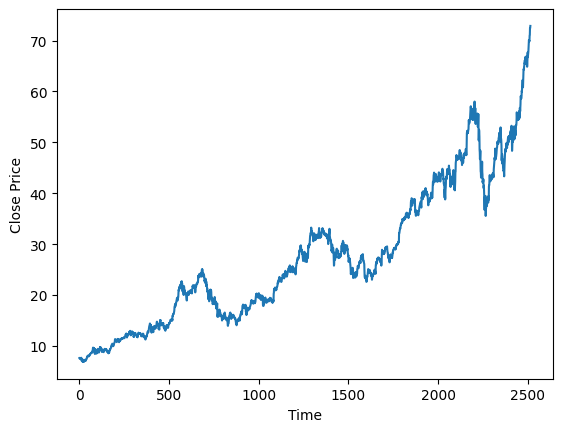

Training data shape: (1760, 1)
Testing data shape: (755, 1)
x_train shape: (1660, 100, 1)
y_train shape: (1660,)


/Users/tush/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.1048
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0124
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0119
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 0.0094
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0097
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0089
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0084
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0083
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0070
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0076
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0076
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0077
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0067
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0060
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - lo

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


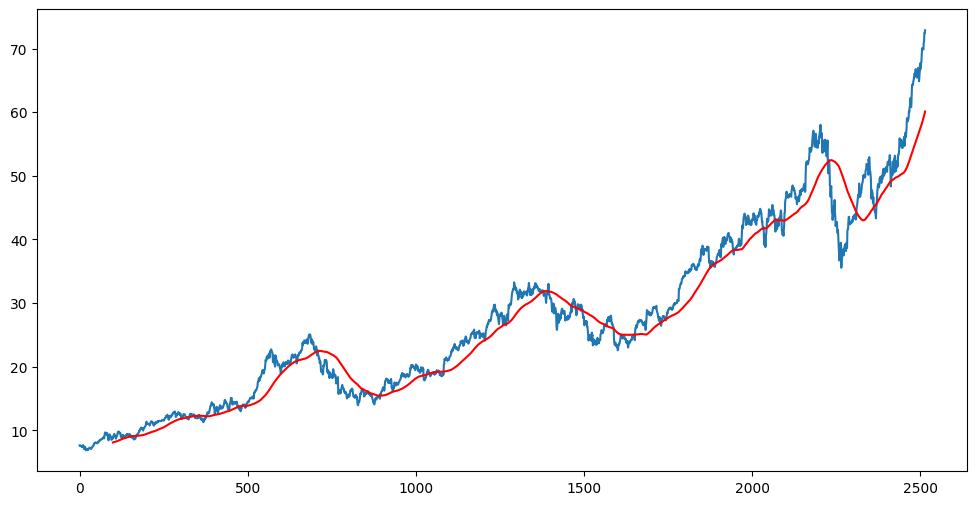

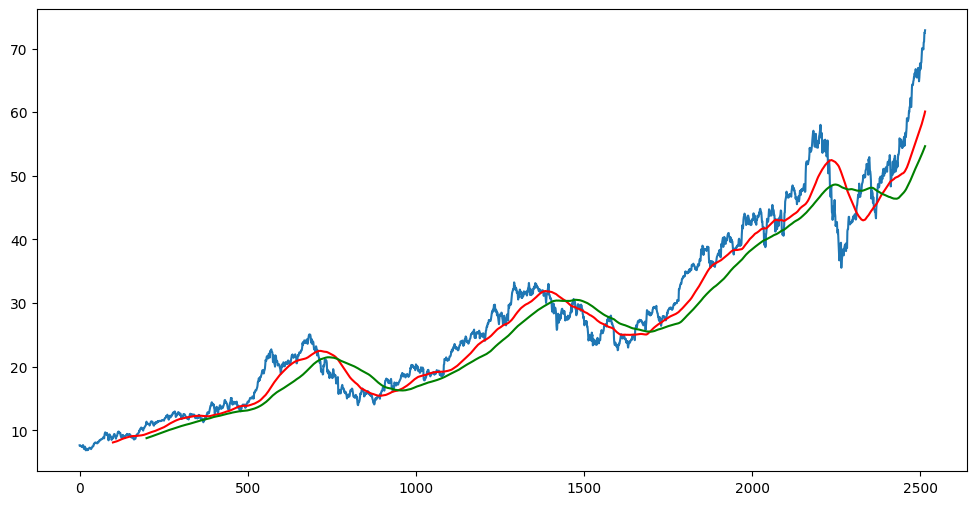

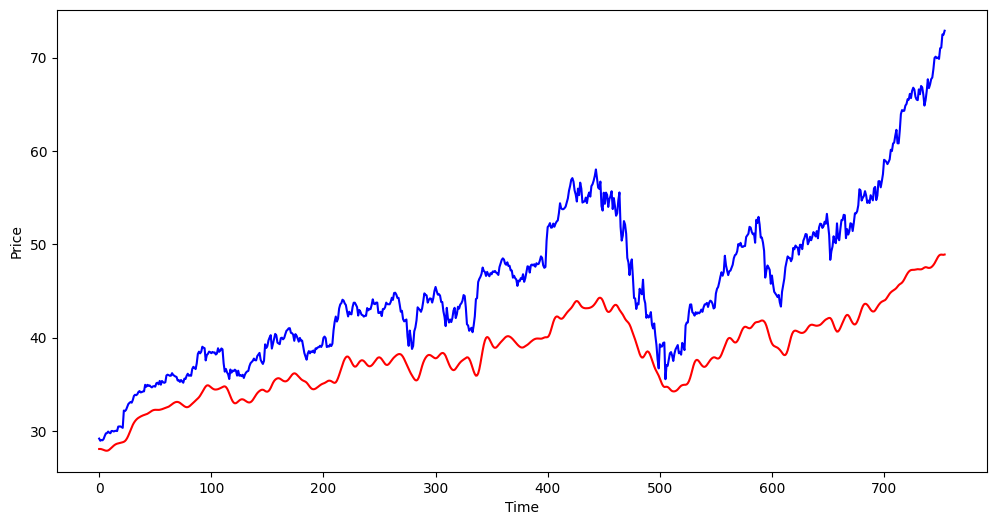

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Fetch the data using yfinance
start_date = '2010-01-01'
end_date = '2019-12-31'
df = yf.download('AAPL', start=start_date, end=end_date)

# Reset index and drop unnecessary columns
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis=1)

# Plotting the Close price
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

# Calculate Moving Averages
ma100 = df['Close'].rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

ma200 = df['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

# Splitting data into training and testing sets
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):])

print(f"Training data shape: {data_training.shape}")
print(f"Testing data shape: {data_testing.shape}")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

# Prepare training data
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
# Build the LSTM model
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50)

# Save the model
model.save('keras_model.h5')

# Prepare testing data
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

# Normalize the testing data
input_data = scaler.transform(final_df)

# Prepare x_test and y_test
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Make predictions
y_predicted = model.predict(x_test)

# Rescale the predicted values back to original scale
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions
fig2 =plt.figure(figsize=(12,6))
plt.plot(y_test, 'b')
plt.plot(y_predicted, 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show(fig2)